In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from tqdm.notebook import tqdm
from ast import literal_eval
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

# Data preprocessing

In [3]:
fake_df = pd.read_csv('fake-and-real-news-dataset/Fake.csv')
true_df = pd.read_csv('fake-and-real-news-dataset/True.csv')

In [4]:
print(fake_df['subject'].value_counts())

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


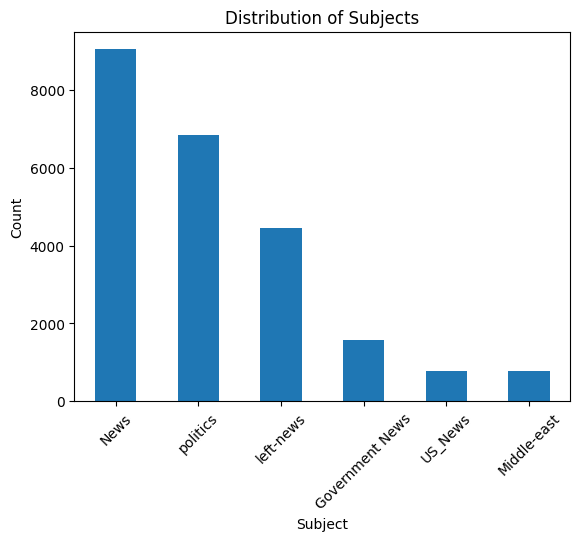

In [5]:
fake_df["subject"].value_counts().plot(kind="bar")

plt.title("Distribution of Subjects")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [6]:
print(true_df['subject'].value_counts())

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


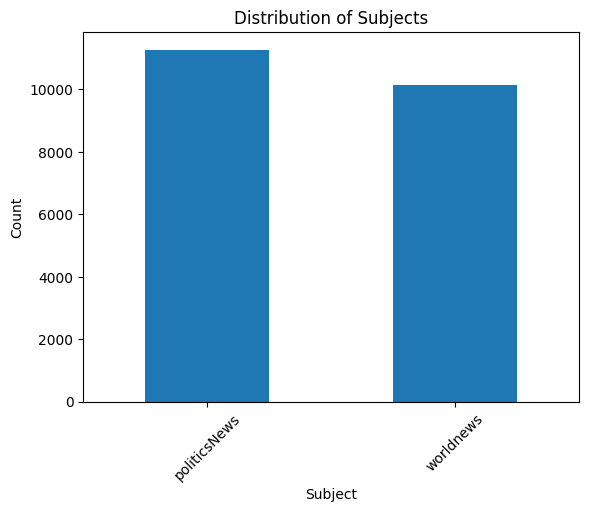

In [7]:
true_df["subject"].value_counts().plot(kind="bar")

plt.title("Distribution of Subjects")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [8]:
mapping_simple = {
    "politicsNews": "politics",
    "politics": "politics",
    "left-news": "politics",
    "Government News": "politics",
    "worldnews": "world",
    "News": "world",
    "US_News": "world",
    "Middle-east": "world"
}

true_df['subject'] = true_df['subject'].map(mapping_simple)
fake_df['subject'] = fake_df['subject'].map(mapping_simple)


In [9]:
print(true_df['subject'].value_counts())

subject
politics    11272
world       10145
Name: count, dtype: int64


In [10]:
print(fake_df['subject'].value_counts())

subject
politics    12870
world       10611
Name: count, dtype: int64


In [11]:
fake_df["class"] = "fake"
true_df["class"] = "true"

df = pd.concat([fake_df, true_df], ignore_index=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [13]:
df.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [14]:
df.duplicated().sum()

5777

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
print(df.sample(5))

                                                   title  \
44034  Turkey kills 99 Kurdish militants in latest op...   
5840    Hillary’s Latest One Word Response To Trump O...   
5666    According To Employees, Trump Often Spied On ...   
7544    Chicago Police Say They Did Not Tell Trump To...   
870     Republican Stuns CNN Host, Wants To Starve Am...   

                                                    text subject  \
44034  ANKARA (Reuters) - Turkish security forces hav...   world   
5840   With the race for president getting hotter by ...   world   
5666   If the way Donald Trump reportedly ran the Mar...   world   
7544   As Addicting Info reported here, Donald Trump ...   world   
870    As if the Republican Party couldn t possibly l...   world   

                     date class  
44034  September 9, 2017   true  
5840        June 17, 2016  fake  
5666        June 30, 2016  fake  
7544       March 12, 2016  fake  
870         July 12, 2017  fake  


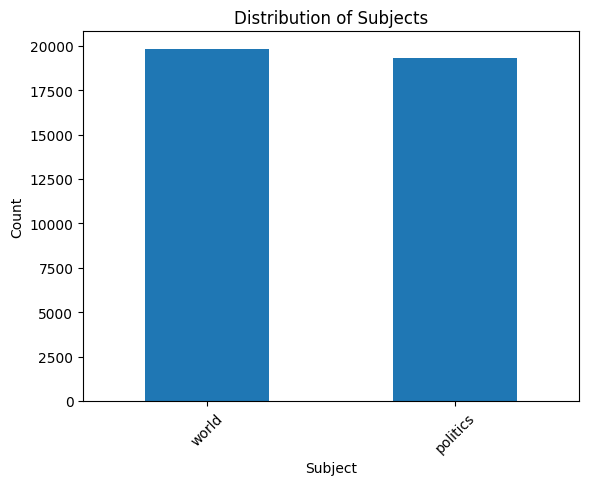

In [18]:
df["subject"].value_counts().plot(kind="bar")

plt.title("Distribution of Subjects")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [19]:
print(df["class"].value_counts())

class
true    21211
fake    17910
Name: count, dtype: int64


In [20]:
#Checking distribution of target variable values
df['class'].value_counts(normalize=True)

class
true    0.54219
fake    0.45781
Name: proportion, dtype: float64

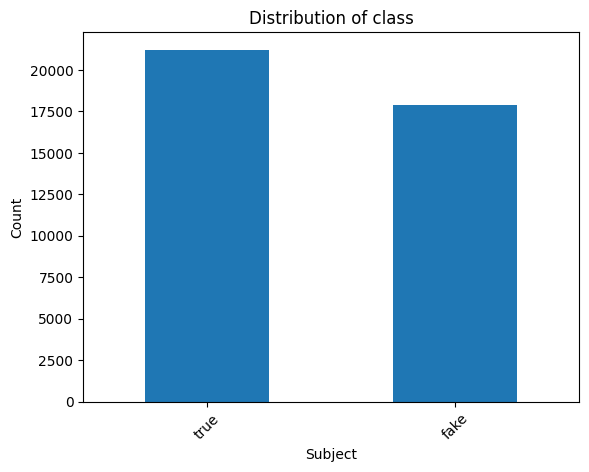

In [21]:
df["class"].value_counts().plot(kind="bar")

plt.title("Distribution of class")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [22]:
X = df["text"]
y = df["class"]
le = LabelEncoder()
y = le.fit_transform(y)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=41
)


In [23]:
with open("pkl_files/X_train_raw.pkl", "wb") as f:
    pickle.dump(X_train_raw, f)

with open("pkl_files/X_test_raw.pkl", "wb") as f:
    pickle.dump(X_test_raw, f)

with open("pkl_files/y_train_raw.pkl", "wb") as f:
    pickle.dump(y_train_raw, f)

with open("pkl_files/y_test_raw.pkl", "wb") as f:
    pickle.dump(y_test_raw, f)


## Text Cleaning

In [24]:
# Regex
import re
def clean_text_regex(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [25]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Abdelrahman
[nltk_data]     Saied\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Abdelrahman
[nltk_data]     Saied\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# Lowercasing
def to_lowercase(tokens):
    return [word.lower() for word in tokens]

In [27]:
# Stop Words
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to C:\Users\Abdelrahman
[nltk_data]     Saied\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

[nltk_data] Downloading package wordnet to C:\Users\Abdelrahman
[nltk_data]     Saied\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess(text):
    text = clean_text_regex(text)
    tokens = word_tokenize(text)
    tokens = to_lowercase(tokens)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return ' '.join(tokens)

In [30]:
df['text'] = df['text'].apply(preprocess)
df['subject'] = df['subject'].apply(preprocess)

In [31]:
df.to_pickle("pkl_files/processed_data.pkl")

In [32]:
X = df['text']
y = df['class']

In [33]:
le = LabelEncoder()
y = le.fit_transform(y)


In [34]:
# Further split the original training set to a train and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, stratify = y, random_state = 41)


In [35]:
with open("pkl_files/X_train.pkl", "wb") as f:
    pickle.dump(X_train, f)

with open("pkl_files/X_test.pkl", "wb") as f:
    pickle.dump(X_test, f)

with open("pkl_files/y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)

with open("pkl_files/y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

## TF-idf

In [36]:
# Creating a copy of the cleaned text
df_clean=df.copy()

In [37]:
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_clean["text"]).split()).value_counts()
word_freq[1:40]

trump         117844
u              55545
state          51899
would          49330
president      46350
republican     36045
people         35893
one            31186
year           30182
reuters        28349
also           27038
new            26856
government     25305
donald         25264
house          24890
clinton        22559
time           22534
country        21964
say            21734
could          21244
united         21222
party          20901
election       20770
told           20660
campaign       19799
obama          19686
white          19653
like           19075
official       18734
american       18528
last           18227
right          17644
two            17537
group          16327
washington     15965
first          15881
news           15782
former         15606
law            15441
Name: count, dtype: int64

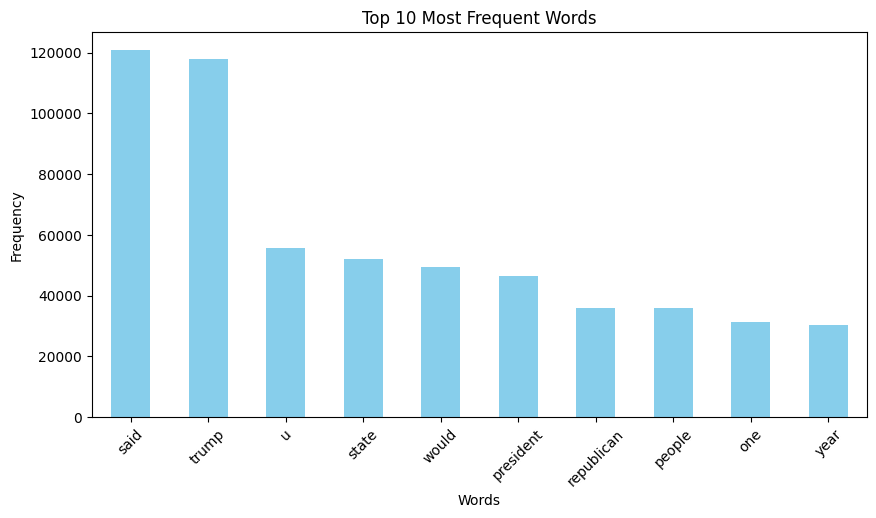

In [49]:
top_words = word_freq.head(10)

plt.figure(figsize=(10, 5))
top_words.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [38]:
# list the least 10 words used and set the name of their repetition to "freq"
word_freq[-10:].reset_index(name='freq')

,index,freq
0,bottomlol,1
1,pictwittercomcmjksxmsz,1
2,statehowever,1
3,tweetdeckthe,1
4,margintrump,1
5,profitabilityrecently,1
6,gutsfeature,1
7,stonewhile,1
8,bromanceif,1
9,perdangangan,1


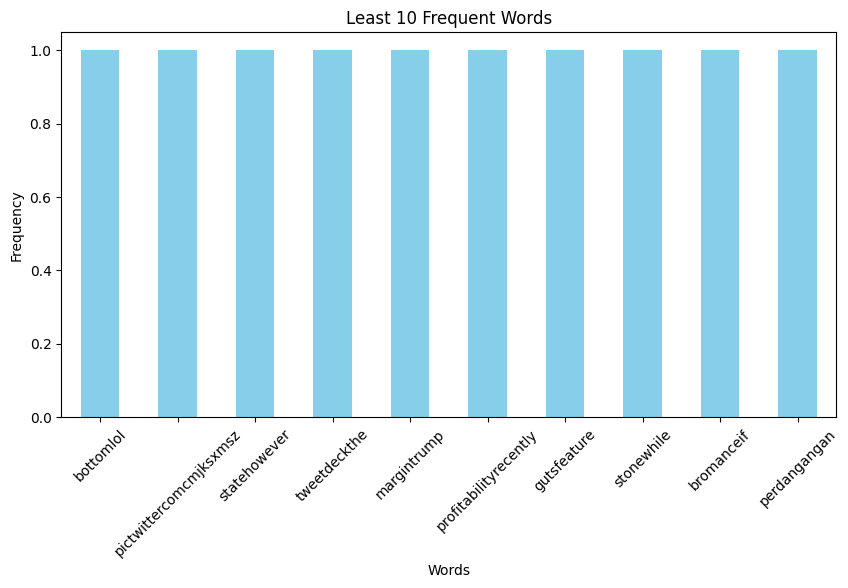

In [51]:
least_words = word_freq.tail(10)

plt.figure(figsize=(10, 5))
least_words.plot(kind="bar", color="skyblue")
plt.title("Least 10 Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [39]:
bow_vectorizer = CountVectorizer(
    analyzer="word",
    max_df=0.3,
    min_df=10,
    ngram_range=(1, 2)
)

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [40]:
tfidf_vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:
X_train_combined = hstack([X_train_bow, X_train_tfidf])
X_test_combined = hstack([X_test_bow, X_test_tfidf])

In [42]:
with open("pkl_files/X_train_combined.pkl", "wb") as f:
    pickle.dump(X_train_combined, f)

with open("pkl_files/X_test_combined.pkl", "wb") as f:
    pickle.dump(X_test_combined, f)


-------------------------------------------------------------

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
max_words = 10000
# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
# Fit the tokenizer on the cleaned training reviews
tokenizer.fit_on_texts(X_train)

In [45]:
max_len = 200
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)

In [46]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [47]:
with open("pkl_files/X_train_padded.pkl", "wb") as f:
    pickle.dump(X_train_padded, f)

with open("pkl_files/X_test_padded.pkl", "wb") as f:
    pickle.dump(X_test_padded, f)


------------------------------------